# Alpha diversity plots by body size

In [1]:
require(ggplot2)
require(reshape2)
require(multcomp)

Loading required package: ggplot2
Loading required package: reshape2
Loading required package: multcomp
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



## Loading data

In [2]:
otus <- read.table('../adiv/tsvs/observed_10k.tsv', header=TRUE, sep='\t', row.names=1)
md <- read.table('../metadata/5per_10k.2.18.19.short.txt', header=TRUE, row.names=1, sep='\t', quote='')

outdir = '../adiv/plots'
dir.create(outdir, showWarnings = FALSE)

add observed otus

In [3]:
div_md <- merge(x = md, y = otus, by="row.names")

Plot by body mass

In [4]:
class_colors = c('Mammalia' = '#6a3d9a', 
                 'Aves' = '#EACB47')

Warning message:
“Removed 34 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 34 rows containing missing values (geom_point).”Warning message:
“Removed 34 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 34 rows containing missing values (geom_point).”

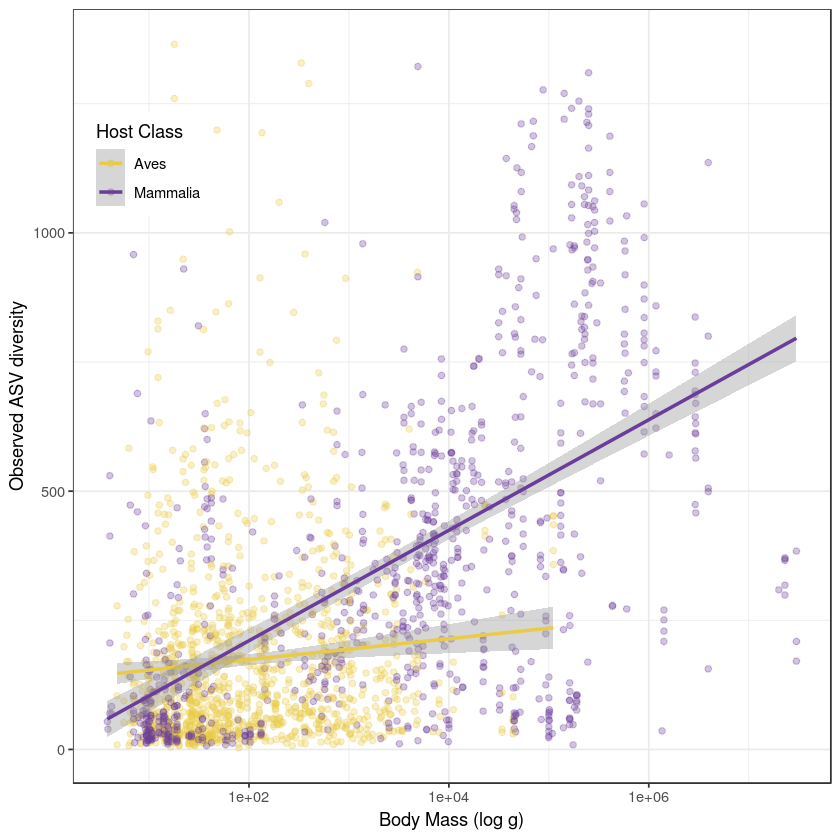

In [5]:
mammal_bird_div <- ggplot(subset(div_md, Taxonomy_Class %in% c('Mammalia', 'Aves')),
       aes(x = ET.BodyMass.Value, y = observed_otus, color = Taxonomy_Class)) + 
  geom_point(alpha=0.3) + 
  geom_smooth(method='lm') + 
  scale_color_manual(values = class_colors,
                     name = 'Host Class') +
  scale_x_log10() + 
  theme_bw() + 
  labs(x = "Body Mass (log g)",
       y = "Observed ASV diversity") +
  theme(legend.position = c(0.1,0.8 ))

ggsave(mammal_bird_div, 
       filename = file.path(outdir, 'diversity_otus_mammal_bird.png'), 
       width=5,
       height=4)

mammal_bird_div

Create additional metadata category so we can separate out the bats and flightless birds specifically

In [6]:
div_md$Taxonomy_Class_bats <- div_md$Taxonomy_Class
levels(div_md$Taxonomy_Class_bats) <- c(levels(div_md$Taxonomy_Class_bats), 'Bats')
levels(div_md$Taxonomy_Class_bats) <- c(levels(div_md$Taxonomy_Class_bats), 'Flightless birds')

div_md[div_md$Taxonomy_Order == 'Chiroptera', 'Taxonomy_Class_bats'] <- 'Bats'
div_md[(div_md$flight_status == 'flightless') &
       (div_md$Taxonomy_Class == 'Aves'), 'Taxonomy_Class_bats'] <- 'Flightless birds'

flight_colors = c('Mammalia' = '#6a3d9a', 
                  'Aves' = '#EACB47',
                  'Bats' = '#000000',
                  'Flightless birds' = '#0000CC')

In [7]:
div_md$Taxonomy_Class_paleo <- div_md$Taxonomy_Class
levels(div_md$Taxonomy_Class_paleo) <- c(levels(div_md$Taxonomy_Class_paleo), 'Bats')
levels(div_md$Taxonomy_Class_paleo) <- c(levels(div_md$Taxonomy_Class_paleo), 'Paleognath birds')

div_md[div_md$Taxonomy_Order == 'Chiroptera', 'Taxonomy_Class_paleo'] <- 'Bats'
div_md[div_md$Taxonomy_Order %in% c('Apterygiformes',
                                    'Rheiformes',
                                    'Struthioniformes',
                                    'Tinamiformes',
                                    'Casuariformes'),
       'Taxonomy_Class_paleo'] <- 'Paleognath birds'


Warning message:
“Removed 34 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 34 rows containing missing values (geom_point).”Warning message:
“Removed 34 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 34 rows containing missing values (geom_point).”

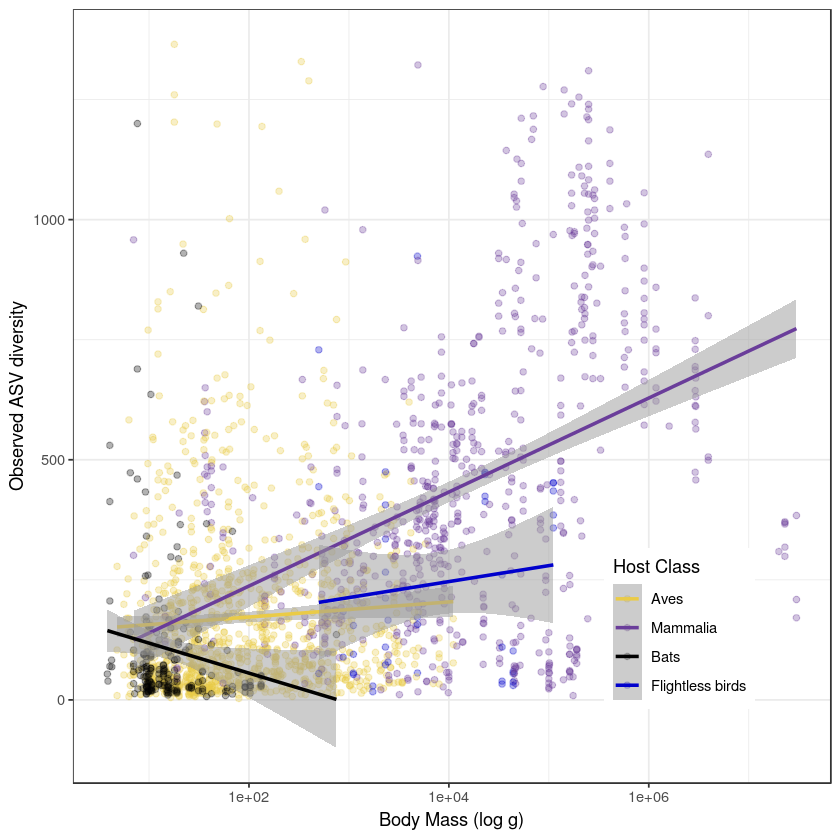

In [8]:
mammal_bird_bat_fb_div <- ggplot(subset(div_md, Taxonomy_Class_bats %in% c('Mammalia', 'Aves', 'Bats', 'Flightless birds')),
       aes(x = ET.BodyMass.Value, y = observed_otus, color = Taxonomy_Class_bats)) + 
  geom_point(alpha=0.3) + 
  geom_smooth(method='lm', alpha=0.5) + 
  scale_color_manual(values = flight_colors,
                     name = 'Host Class') +
  scale_x_log10() + 
  theme_bw() + 
  labs(x = "Body Mass (log g)",
       y = "Observed ASV diversity") +
  theme(legend.position = c(0.8,0.2 ))

ggsave(mammal_bird_bat_fb_div, 
       filename = file.path(outdir, 'diversity_otus_mammal_bird_bat_flbirds.png'),
       width=5,
       height=4)

mammal_bird_bat_fb_div

In [10]:
paleo_colors = c('Mammalia' = '#6a3d9a', 
                  'Aves' = '#EACB47',
                  'Bats' = '#000000',
                  'Paleognath birds' = '#0000CC')

Warning message:
“Removed 34 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 34 rows containing missing values (geom_point).”

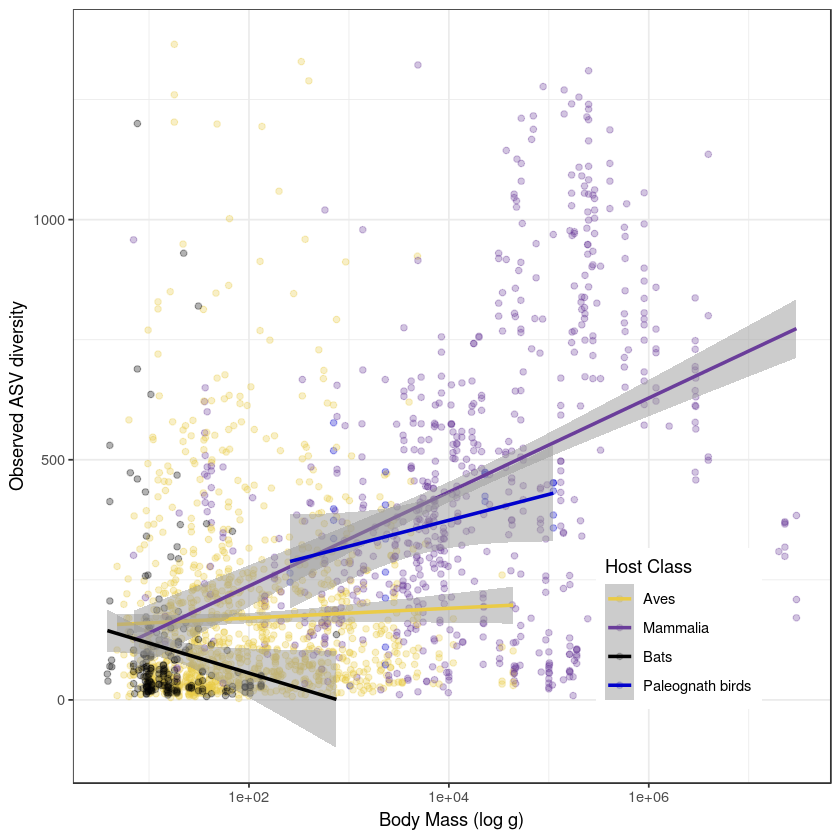

In [11]:
mammal_bird_bat_fb_div <- ggplot(subset(div_md, Taxonomy_Class_paleo %in% c('Mammalia', 'Aves', 'Bats', 'Paleognath birds')),
       aes(x = ET.BodyMass.Value, y = observed_otus, color = Taxonomy_Class_paleo)) + 
  geom_point(alpha=0.3) + 
  geom_smooth(method='lm', alpha=0.5) + 
  scale_color_manual(values = paleo_colors,
                     name = 'Host Class') +
  scale_x_log10() + 
  theme_bw() + 
  labs(x = "Body Mass (log g)",
       y = "Observed ASV diversity") +
  theme(legend.position = c(0.8,0.2 ))

# ggsave(mammal_bird_bat_fb_div, 
#        filename = file.path(outdir, 'diversity_otus_mammal_bird_bat_flbirds.png'),
#        width=5,
#        height=4)

mammal_bird_bat_fb_div

Melt dataframe so we can plot alpha div values with facets

In [15]:
div_md_melt <- melt(div_md[c('Row.names',
                             'Taxonomy_Class',
                             'Taxonomy_Order',
                             'Taxonomy_Family',
                             'Taxonomy_Genus',
                             'Taxonomy_Species',
                             'flight_status',
                             'pd_10k',
                             'shannon_10k',
                             'observed_otus')],
                    id.vars=c('Row.names',
                             'Taxonomy_Class',
                             'Taxonomy_Order',
                             'Taxonomy_Family',
                             'Taxonomy_Genus',
                             'Taxonomy_Species',
                             'flight_status'))

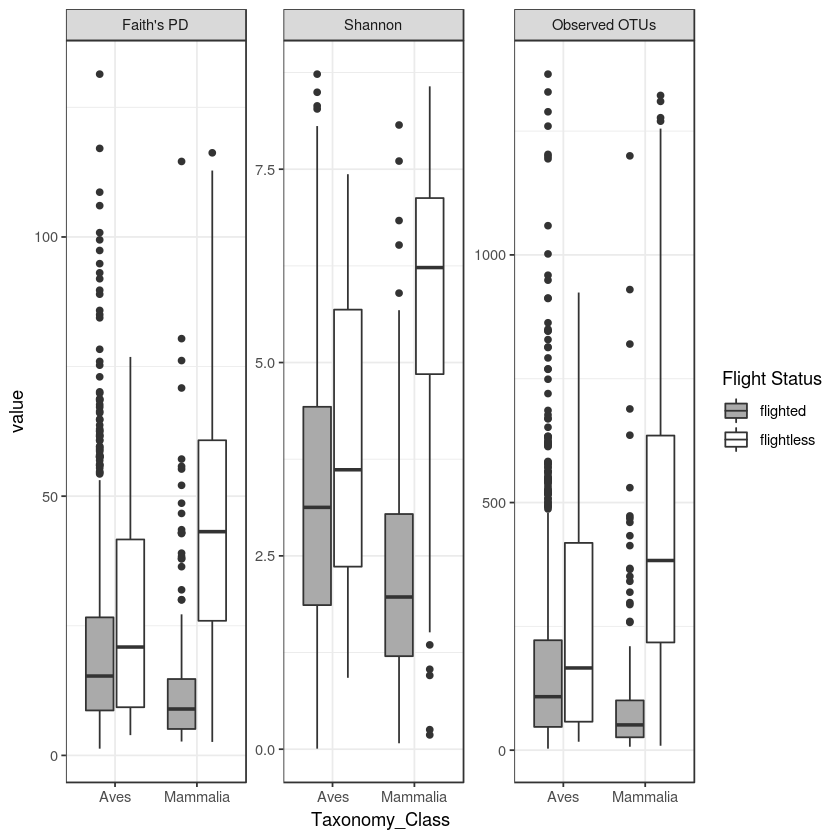

In [16]:
div_melt_bm <- subset(div_md_melt, Taxonomy_Class %in% c('Mammalia', 'Aves'))
levels(div_melt_bm$variable) <- c("Faith's PD",
                                  "Shannon",
                                  "Observed OTUs")
alpha_boxplot_mam_bird <- ggplot(div_melt_bm,
       aes(x = Taxonomy_Class, y = value, fill = flight_status)) + 
  geom_boxplot() + 
  facet_wrap(~ variable, 
             scale='free') +
  scale_fill_manual(values = c('flighted' = '#AAAAAA',
                               'flightless' = '#FFFFFF'),
                     name = 'Flight Status') +
  theme_bw()

ggsave(alpha_boxplot_mam_bird, 
       filename = file.path(outdir,'alpha_boxplots_birds_mams_flight.png'), 
       width=8,
       height=5)

alpha_boxplot_mam_bird

#### Pairwise tests

We'll use the general linear hypothesis test from the `multcomp` package, as this has better peformance for unbalanced datasets. Because diversity measurements for PD and observed OTUs are approximately log-normal distributed, we'll log-transform them.

In [17]:
z <- aov(log10(observed_otus) ~ Taxonomy_Class_bats, data=subset(div_md, Taxonomy_Class %in% c("Aves", "Mammalia")))

In [18]:
summary(glht(z, linfct = mcp(Taxonomy_Class_bats = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = log10(observed_otus) ~ Taxonomy_Class_bats, data = subset(div_md, 
    Taxonomy_Class %in% c("Aves", "Mammalia")))

Linear Hypotheses:
                                 Estimate Std. Error t value Pr(>|t|)    
Mammalia - Aves == 0              0.50698    0.02085  24.311   <0.001 ***
Bats - Aves == 0                 -0.27517    0.03203  -8.590   <0.001 ***
Flightless birds - Aves == 0      0.17075    0.06697   2.550   0.0452 *  
Bats - Mammalia == 0             -0.78215    0.03373 -23.186   <0.001 ***
Flightless birds - Mammalia == 0 -0.33623    0.06780  -4.959   <0.001 ***
Flightless birds - Bats == 0      0.44592    0.07203   6.191   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [19]:
z <- aov(log10(pd_10k) ~ Taxonomy_Class_bats, data=subset(div_md, Taxonomy_Class %in% c("Aves", "Mammalia")))

In [20]:
summary(glht(z, linfct = mcp(Taxonomy_Class_bats = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = log10(pd_10k) ~ Taxonomy_Class_bats, data = subset(div_md, 
    Taxonomy_Class %in% c("Aves", "Mammalia")))

Linear Hypotheses:
                                 Estimate Std. Error t value Pr(>|t|)    
Mammalia - Aves == 0              0.38567    0.01599  24.123   <1e-04 ***
Bats - Aves == 0                 -0.19953    0.02456  -8.125   <1e-04 ***
Flightless birds - Aves == 0      0.09867    0.05134   1.922    0.197    
Bats - Mammalia == 0             -0.58520    0.02586 -22.627   <1e-04 ***
Flightless birds - Mammalia == 0 -0.28700    0.05198  -5.522   <1e-04 ***
Flightless birds - Bats == 0      0.29820    0.05522   5.400   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [21]:
z <- aov(shannon_10k ~ Taxonomy_Class_bats, data=subset(div_md, Taxonomy_Class %in% c("Aves", "Mammalia")))

In [22]:
summary(glht(z, linfct = mcp(Taxonomy_Class_bats = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = shannon_10k ~ Taxonomy_Class_bats, data = subset(div_md, 
    Taxonomy_Class %in% c("Aves", "Mammalia")))

Linear Hypotheses:
                                 Estimate Std. Error t value Pr(>|t|)    
Mammalia - Aves == 0              2.64220    0.08269  31.954   <0.001 ***
Bats - Aves == 0                 -0.95593    0.12702  -7.526   <0.001 ***
Flightless birds - Aves == 0      0.73880    0.26554   2.782   0.0236 *  
Bats - Mammalia == 0             -3.59813    0.13376 -26.900   <0.001 ***
Flightless birds - Mammalia == 0 -1.90341    0.26883  -7.080   <0.001 ***
Flightless birds - Bats == 0      1.69472    0.28560   5.934   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


### Linear regressions of observed OTUs against log body mass

We can look broadly at mammals vs birds:

In [23]:
n <- lm(observed_otus ~ log10(ET.BodyMass.Value) * Taxonomy_Class, 
   data=subset(div_md, 
                Taxonomy_Class %in% c('Mammalia', 'Aves')))

In [24]:
summary(n)


Call:
lm(formula = observed_otus ~ log10(ET.BodyMass.Value) * Taxonomy_Class, 
    data = subset(div_md, Taxonomy_Class %in% c("Mammalia", "Aves")))

Residuals:
    Min      1Q  Median      3Q     Max 
-625.18 -125.69  -52.65   77.72 1206.21 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                      133.418     17.156   7.777
log10(ET.BodyMass.Value)                          20.249      7.868   2.574
Taxonomy_ClassMammalia                          -136.737     24.570  -5.565
log10(ET.BodyMass.Value):Taxonomy_ClassMammalia   86.678      9.082   9.544
                                                Pr(>|t|)    
(Intercept)                                     1.17e-14 ***
log10(ET.BodyMass.Value)                          0.0101 *  
Taxonomy_ClassMammalia                          2.96e-08 ***
log10(ET.BodyMass.Value):Taxonomy_ClassMammalia  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

We find that there's a moderately significant relationship taking birds as a whole (p == 0.01), but a very signficiant cofficient for mammals (p << 0.001).

Breaking into flighted/flightless categories for birds and mammals, we find that the relationship only holds true in the non-flighted mammals:

In [25]:
m <- lm(observed_otus ~ log10(ET.BodyMass.Value) * Taxonomy_Class_bats, 
   data=subset(div_md, 
                Taxonomy_Class_bats %in% c('Mammalia', 'Aves', 'Bats', 'Flightless birds')))

In [26]:
summary(m)


Call:
lm(formula = observed_otus ~ log10(ET.BodyMass.Value) * Taxonomy_Class_bats, 
    data = subset(div_md, Taxonomy_Class_bats %in% c("Mammalia", 
        "Aves", "Bats", "Flightless birds")))

Residuals:
    Min      1Q  Median      3Q     Max 
-605.64 -123.52  -51.64   78.25 1204.20 

Coefficients:
                                                             Estimate
(Intercept)                                                    141.09
log10(ET.BodyMass.Value)                                        15.72
Taxonomy_Class_batsMammalia                                    -99.67
Taxonomy_Class_batsBats                                         39.65
Taxonomy_Class_batsFlightless birds                            -27.76
log10(ET.BodyMass.Value):Taxonomy_Class_batsMammalia            82.13
log10(ET.BodyMass.Value):Taxonomy_Class_batsBats               -78.21
log10(ET.BodyMass.Value):Taxonomy_Class_batsFlightless birds    17.53
                                                             Std

In [37]:
anova(m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log10(ET.BodyMass.Value),1,41014286,41014286.34,840.04212,4.669098e-155
Taxonomy_Class_bats,3,4328356,1442785.22,29.55069,1.062177e-18
log10(ET.BodyMass.Value):Taxonomy_Class_bats,3,3054543,1018181.05,20.85407,2.622688e-13
Residuals,2047,99942898,48824.08,NA,NA


Alternatively, we can do individual regressions for each class:

In [12]:
lm_fl_birds <- lm(observed_otus ~ log10(ET.BodyMass.Value), 
   data=subset(div_md, 
                Taxonomy_Class_bats %in% c('Flightless birds')))

lm_pa_birds <- lm(observed_otus ~ log10(ET.BodyMass.Value), 
   data=subset(div_md, 
                Taxonomy_Class_paleo %in% c('Paleognath birds')))

lm_bats <- lm(observed_otus ~ log10(ET.BodyMass.Value), 
   data=subset(div_md, 
                Taxonomy_Class_paleo %in% c('Bats')))

lm_mams <- lm(observed_otus ~ log10(ET.BodyMass.Value), 
   data=subset(div_md, 
                Taxonomy_Class_paleo %in% c('Mammalia')))

lm_birds <- lm(observed_otus ~ log10(ET.BodyMass.Value), 
   data=subset(div_md, 
                Taxonomy_Class_paleo %in% c('Aves')))

In [13]:
pvals <- c(summary(lm_fl_birds)$coefficients[2,4],
           summary(lm_pa_birds)$coefficients[2,4],
           summary(lm_bats)$coefficients[2,4],
           summary(lm_mams)$coefficients[2,4],
           summary(lm_birds)$coefficients[2,4])


In [14]:
pvals

[1] 4.416037e-01 8.756799e-02 4.033507e-02 2.372659e-26 1.524798e-01

In [15]:
p.adjust(pvals, method="bonferroni")

[1] 1.000000e+00 4.378399e-01 2.016753e-01 1.186329e-25 7.623990e-01

In [16]:
rsq <- c(summary(lm_fl_birds)$r.squared,
         summary(lm_pa_birds)$r.squared,
           summary(lm_bats)$r.squared,
           summary(lm_mams)$r.squared,
           summary(lm_birds)$r.squared)

In [17]:
rsq

[1] 0.014512372 0.121596363 0.021059649 0.153385695 0.001782519

## Migration impact on alpha diversity

In [71]:
mig_md = subset(div_md, (Taxonomy_Class == 'Aves') &
                        (migratory %in% c('yes','no','partial')))

In [72]:
mig_md_melt <- melt(mig_md[c('Row.names',
                             'Taxonomy_Class',
                             'Taxonomy_Order',
                             'Taxonomy_Family',
                             'Taxonomy_Genus',
                             'Taxonomy_Species',
                             'flight_status',
                             'pd_10k',
                             'shannon_10k',
                             'observed_otus',
                             'migratory')],
                    id.vars=c('Row.names',
                             'Taxonomy_Class',
                             'Taxonomy_Order',
                             'Taxonomy_Family',
                             'Taxonomy_Genus',
                             'Taxonomy_Species',
                             'flight_status',
                             'migratory'))

levels(mig_md_melt$variable) <- c("Faith's PD",
                                  "Shannon",
                                  "Observed OTUs")

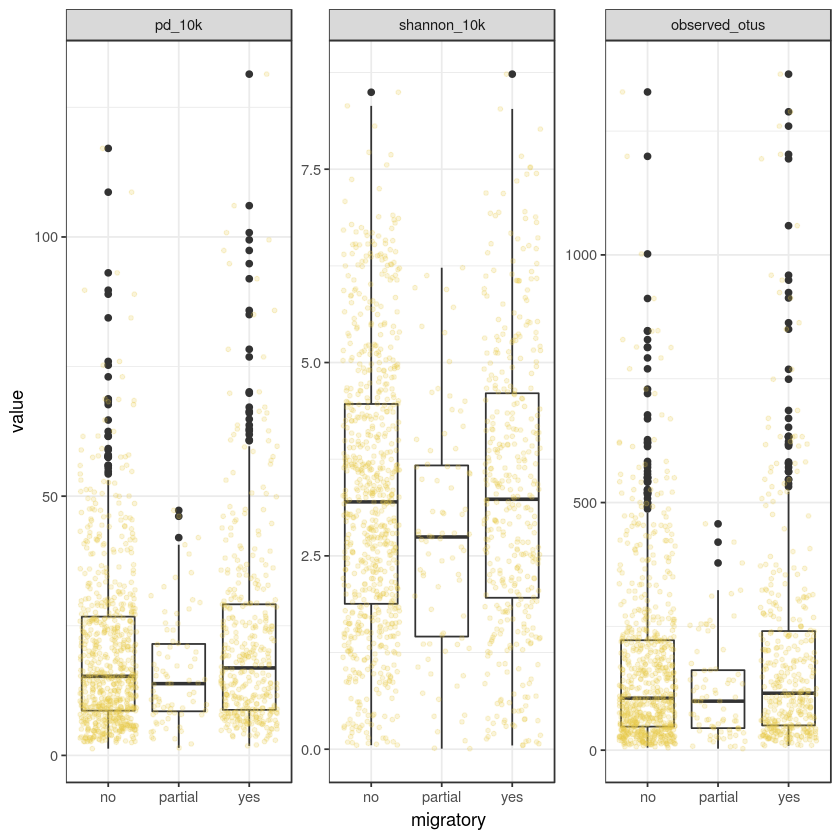

In [96]:
alpha_boxplot_migrate <- ggplot(mig_md_melt, aes(x=migratory, y=value)) + 
                            geom_boxplot() +
                            geom_jitter(alpha=0.2, size=1, color='#EACB47') +
                            facet_wrap(~variable, scale='free_y') +
                            theme_bw()


ggsave(alpha_boxplot_migrate, 
       filename = file.path(outdir,'alpha_boxplots_birds_migration.png'), 
       width=8,
       height=5)

alpha_boxplot_migrate

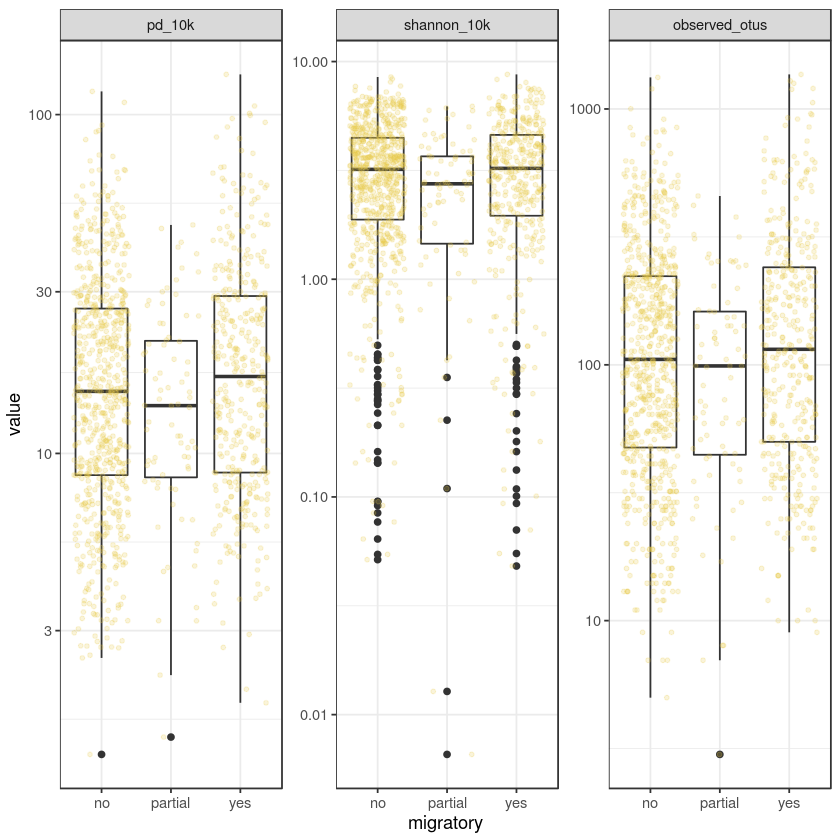

In [97]:
alpha_boxplot_migrate_log <- ggplot(mig_md_melt, aes(x=migratory, y=value)) + 
                            geom_boxplot() +
                            geom_jitter(alpha=0.2, size=1, color='#EACB47') +
                            facet_wrap(~variable, scale='free_y') +
                            scale_y_log10() +
                            theme_bw()


ggsave(alpha_boxplot_migrate_log, 
       filename = file.path(outdir,'alpha_boxplots_birds_migration.log.png'), 
       width=8,
       height=5)

alpha_boxplot_migrate_log

In [110]:
a <- aov(log10(observed_otus) ~ migratory, data=mig_md)

In [111]:
summary(glht(a, linfct = mcp(migratory = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = log10(observed_otus) ~ migratory, data = mig_md)

Linear Hypotheses:
                   Estimate Std. Error t value Pr(>|t|)  
partial - no == 0  -0.10300    0.05405  -1.906   0.1298  
yes - no == 0       0.04708    0.02900   1.623   0.2255  
yes - partial == 0  0.15008    0.05632   2.665   0.0196 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [112]:
b <- aov(log10(pd_10k) ~ migratory, data=mig_md)

In [113]:
summary(glht(b, linfct = mcp(migratory = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = log10(pd_10k) ~ migratory, data = mig_md)

Linear Hypotheses:
                   Estimate Std. Error t value Pr(>|t|)  
partial - no == 0  -0.06498    0.04057  -1.602    0.234  
yes - no == 0       0.04403    0.02177   2.023    0.101  
yes - partial == 0  0.10902    0.04228   2.579    0.025 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [114]:
c <- aov(shannon_10k ~ migratory, data=mig_md)

In [115]:
summary(glht(c, linfct = mcp(migratory = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = shannon_10k ~ migratory, data = mig_md)

Linear Hypotheses:
                   Estimate Std. Error t value Pr(>|t|)  
partial - no == 0  -0.51082    0.21167  -2.413   0.0391 *
yes - no == 0       0.06255    0.11358   0.551   0.8404  
yes - partial == 0  0.57336    0.22057   2.600   0.0238 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)
